<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Final-Project-Submission" data-toc-modified-id="Final-Project-Submission-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Final Project Submission</a></span></li><li><span><a href="#Initial-Data-Exploration" data-toc-modified-id="Initial-Data-Exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Initial Data Exploration</a></span><ul class="toc-item"><li><span><a href="#Import-relevant-features" data-toc-modified-id="Import-relevant-features-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Import relevant features</a></span></li><li><span><a href="#Load-up-the-data" data-toc-modified-id="Load-up-the-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Load up the data</a></span></li><li><span><a href="#Initial-Data-Exploration" data-toc-modified-id="Initial-Data-Exploration-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Initial Data Exploration</a></span></li></ul></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Dropping-columns" data-toc-modified-id="Dropping-columns-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Dropping columns</a></span></li><li><span><a href="#Fixing-null-values" data-toc-modified-id="Fixing-null-values-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Fixing null values</a></span></li></ul></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Exploration</a></span><ul class="toc-item"><li><span><a href="#3-Central-Questions" data-toc-modified-id="3-Central-Questions-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>3 Central Questions</a></span><ul class="toc-item"><li><span><a href="#What-are-the-most-salient-features-of-a-house-that-can-be-changed-in-order-to-impact-sale-price?" data-toc-modified-id="What-are-the-most-salient-features-of-a-house-that-can-be-changed-in-order-to-impact-sale-price?-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>What are the most salient features of a house that can be changed in order to impact sale price?</a></span></li><li><span><a href="#Which-immutable-features-of-the-house-(location,-year-built)-will-most-drastically-impact-sale-price?" data-toc-modified-id="Which-immutable-features-of-the-house-(location,-year-built)-will-most-drastically-impact-sale-price?-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Which immutable features of the house (location, year built) will most drastically impact sale price?</a></span></li><li><span><a href="#Will-investment-in-the-aspects-of-the-house-that-are-changible-be-cost-effective?" data-toc-modified-id="Will-investment-in-the-aspects-of-the-house-that-are-changible-be-cost-effective?-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Will investment in the aspects of the house that are changible be cost effective?</a></span></li></ul></li><li><span><a href="#Normalizing-Data" data-toc-modified-id="Normalizing-Data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Normalizing Data</a></span></li><li><span><a href="#Visualizing-Data" data-toc-modified-id="Visualizing-Data-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Visualizing Data</a></span><ul class="toc-item"><li><span><a href="#Histogram" data-toc-modified-id="Histogram-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Histogram</a></span></li><li><span><a href="#Removing-Outliers" data-toc-modified-id="Removing-Outliers-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Removing Outliers</a></span></li><li><span><a href="#Jointplot---Checking-for-linearity" data-toc-modified-id="Jointplot---Checking-for-linearity-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Jointplot - Checking for linearity</a></span></li><li><span><a href="#One-hot-Encoding-Categorical-Variables" data-toc-modified-id="One-hot-Encoding-Categorical-Variables-4.3.4"><span class="toc-item-num">4.3.4&nbsp;&nbsp;</span>One-hot Encoding Categorical Variables</a></span></li><li><span><a href="#Log-Tranformation" data-toc-modified-id="Log-Tranformation-4.3.5"><span class="toc-item-num">4.3.5&nbsp;&nbsp;</span>Log Tranformation</a></span></li></ul></li></ul></li><li><span><a href="#Fitting-the-model" data-toc-modified-id="Fitting-the-model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Fitting the model</a></span><ul class="toc-item"><li><span><a href="#Making-a-hypothesis" data-toc-modified-id="Making-a-hypothesis-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Making a hypothesis</a></span><ul class="toc-item"><li><span><a href="#Hypothesis" data-toc-modified-id="Hypothesis-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Hypothesis</a></span></li></ul></li><li><span><a href="#Train/Test-Split" data-toc-modified-id="Train/Test-Split-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Train/Test Split</a></span></li><li><span><a href="#Fitting-the-model-to-the-train-data" data-toc-modified-id="Fitting-the-model-to-the-train-data-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Fitting the model to the train data</a></span></li><li><span><a href="#Removing-non-influencial-features" data-toc-modified-id="Removing-non-influencial-features-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Removing non-influencial features</a></span></li><li><span><a href="#Checking-for-Multicollinearity" data-toc-modified-id="Checking-for-Multicollinearity-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Checking for Multicollinearity</a></span><ul class="toc-item"><li><span><a href="#Using-variance-inflation-factor-to-remove-multicollinear-features." data-toc-modified-id="Using-variance-inflation-factor-to-remove-multicollinear-features.-5.5.1"><span class="toc-item-num">5.5.1&nbsp;&nbsp;</span>Using variance inflation factor to remove multicollinear features.</a></span></li><li><span><a href="#Another-check-to-remove-high-p-scores" data-toc-modified-id="Another-check-to-remove-high-p-scores-5.5.2"><span class="toc-item-num">5.5.2&nbsp;&nbsp;</span>Another check to remove high p scores</a></span></li></ul></li><li><span><a href="#Normality-Check" data-toc-modified-id="Normality-Check-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Normality Check</a></span></li><li><span><a href="#Homoscedasticity-Check" data-toc-modified-id="Homoscedasticity-Check-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Homoscedasticity Check</a></span></li><li><span><a href="#Cross-Validation-(ish)" data-toc-modified-id="Cross-Validation-(ish)-5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>Cross-Validation (ish)</a></span></li></ul></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#What-are-the-most-salient-features-of-a-house-that-can-be-changed-in-order-to-impact-sale-price?" data-toc-modified-id="What-are-the-most-salient-features-of-a-house-that-can-be-changed-in-order-to-impact-sale-price?-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>What are the most salient features of a house that can be changed in order to impact sale price?</a></span></li><li><span><a href="#Which-immutable-features-of-the-house-(location,-year-built)-will-most-drastically-impact-sale-price?" data-toc-modified-id="Which-immutable-features-of-the-house-(location,-year-built)-will-most-drastically-impact-sale-price?-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Which immutable features of the house (location, year built) will most drastically impact sale price?</a></span></li><li><span><a href="#Will-investment-in-the-aspects-of-the-house-that-are-changible-be-cost-effective?" data-toc-modified-id="Will-investment-in-the-aspects-of-the-house-that-are-changible-be-cost-effective?-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Will investment in the aspects of the house that are changible be cost effective?</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Future-Steps" data-toc-modified-id="Future-Steps-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Future Steps</a></span></li></ul></div>

# Final Project Submission

Please fill out:
* Student name: Stephen Turk 
* Student pace: part time
* Scheduled project review date/time: 8/20/20 at 400 MST/ 600EST
* Instructor name: James Irving
* Blog post URL:


# Initial Data Exploration

## Import relevant features

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-muted')
sns.set_style('ticks')
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

## Load up the data

In [2]:
data = pd.read_csv('kc_house_data.csv')

## Initial Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
data.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

With all the orginal columns in checking for correllation, primarily with the price column.

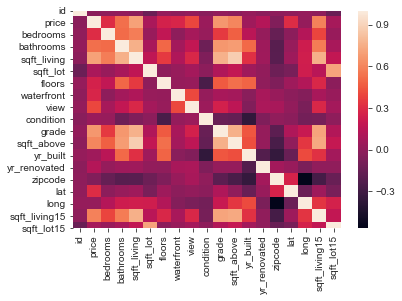

In [5]:
corr = data.corr()

sns.heatmap(corr)
plt.show()


In [6]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Data Cleaning

## Dropping columns 

Droping columns that showed little correllation and from the column descriptions only seemed moderately useful. Date sold might be useful in terms of sesason or important to adjust for if the time period in the data was a bit longer.

In [7]:
data = data.drop([ 'id', 'view', 'date'], axis = 1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(10), object(1)
memory usage: 3.0+ MB


## Fixing null values

 Waterfront needs some data added, but because this data seems categorical (either waterfront or not) I will assume that any missing data most likely was houses that were not on the waterfront.

In [9]:
data['waterfront'].describe()

count    19221.000000
mean         0.007596
std          0.086825
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

In [10]:
data['waterfront'] = data['waterfront'].fillna(0)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(10), object(1)
memory usage: 3.0+ MB


Similarly, SqFt Basement needs to be cast as a float and I will assume a lack of data suggests no basement square-footage.

In [12]:
data['sqft_basement'].head()

0      0.0
1    400.0
2      0.0
3    910.0
4      0.0
Name: sqft_basement, dtype: object

In [13]:
data.sqft_basement = data.sqft_basement.map(lambda x: float(x.replace('?', '0')))

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10)
memory usage: 3.0 MB


Checking for null values

In [15]:
data.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Only need to check into yr_renovated

In [16]:
data['yr_renovated'].head(15)

0        0.0
1     1991.0
2        NaN
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       NaN
13       0.0
14       0.0
Name: yr_renovated, dtype: float64

First I will assume all data that is NaN (not a number) is actually a zero, indicating no renovation had taken place.

In [17]:
data['yr_renovated'] = data['yr_renovated'].fillna(0)

In [18]:
data.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [19]:
data['yr_renovated'].describe()

count    21597.000000
mean        68.758207
std        364.037499
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

Now I will cast the column as a boolean in order to give a renovated or not column instead of a date renovated. A house renovated in 2015 is not two-thousand "more renovated" than a house that has not been renovated. I'll then cast the column back to integer, but having replaced independent dates with simply a 1 for renovated and a 0 for not renovated. 

In [20]:
data['yr_renovated'] = data['yr_renovated'].astype(bool)

In [21]:
data['yr_renovated'] = data['yr_renovated'].astype(int)

In [22]:
#quick column name change since it is not year renovated any more.
data.rename(columns={'yr_renovated': 'renovated'}, inplace=True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
renovated        21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(11)
memory usage: 3.0 MB


Now, just checking to see how our data looks, befor calling it clean and moving on to the next step.

In [24]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,3.409825,7.657915,1788.596842,285.716581,1970.999676,0.034449,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.650546,1.173200,827.759761,439.819830,29.375234,0.182384,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,1.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
renovated        21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(11)
memory usage: 3.0 MB


Great! We've got no missing values and allour data is in numerical format ready to be used for linear regression.

# Data Exploration

Now that data is in a more digestible it is time to bring in the target stakeholders and begin exploring the data with them in mind.

## 3 Central Questions

###  What are the most salient features of a house that can be changed in order to impact sale price?
###  Which immutable features of the house (location, year built) will most drastically impact sale price?
###  Will investment in the aspects of the house that are changible be cost effective?

Quick look over all columns

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
renovated        21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(11)
memory usage: 3.0 MB


## Normalizing Data

Normalizing data can help to compare accross columns, but is less helpful for showing results to stakeholders. Let's make a copy dataframe for visuals for stakeholders later on.

In [27]:
data_not_normal = data.copy(deep=True)

Normalizing data will not impact how influencial each feature is, but it will enable us to talk about the relative effect each feature has while comparing apples to apples.

In [28]:
def norm_feat(series):
    return (series - series.mean())/series.std()
for feat in ['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']:
    data[feat] = norm_feat(data[feat])
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,21597.000000,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04
mean,5.402966e+05,-2.303005e-16,1.158082e-16,-1.421283e-16,1.579203e-17,-1.473923e-16,-9.212019e-18,1.105442e-16,3.948008e-16,3.158406e-17,-2.895206e-17,2.674117e-15,-3.421607e-17,98077.951845,-1.768913e-14,-9.058046e-15,1.368643e-16,1.842404e-17
std,3.673681e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,53.513072,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,7.800000e+04,-2.562024e+00,-2.101247e+00,-1.862880e+00,-3.520522e-01,-9.155311e-01,-8.249784e-02,-3.704314e+00,-3.970267e+00,-1.713778e+00,-6.496219e-01,-2.416991e+00,-1.888827e-01,98001.000000,-2.917271e+00,-2.167495e+00,-2.316914e+00,-4.439058e-01
25%,3.220000e+05,-4.028937e-01,-4.757266e-01,-7.083297e-01,-2.429067e-01,-9.155311e-01,-8.249784e-02,-6.299719e-01,-5.607873e-01,-7.231529e-01,-6.496219e-01,-6.808346e-01,-1.888827e-01,98033.000000,-6.423086e-01,-8.102234e-01,-7.247493e-01,-2.807861e-01
50%,4.500000e+05,-4.028937e-01,1.744818e-01,-1.855143e-01,-1.806552e-01,1.093901e-02,-8.249784e-02,-6.299719e-01,-5.607873e-01,-2.761633e-01,-6.496219e-01,1.361802e-01,-1.888827e-01,98065.000000,8.449553e-02,-1.209286e-01,-2.139723e-01,-1.883919e-01
75%,6.450000e+05,6.766715e-01,4.995859e-01,5.115728e-01,-1.065957e-01,9.374092e-01,-8.249784e-02,9.071993e-01,2.915825e-01,5.090887e-01,6.008902e-01,8.851104e-01,-1.888827e-01,98118.000000,8.509960e-01,6.323214e-01,5.448965e-01,-9.808756e-02
max,7.700000e+06,3.198406e+01,7.651878e+00,1.248187e+01,3.951112e+01,3.716820e+00,1.212097e+01,2.444371e+00,4.553432e+00,9.207265e+00,1.030941e+01,1.497871e+00,5.294046e+00,98199.000000,1.569861e+00,6.388288e+00,6.163444e+00,3.147422e+01


## Visualizing Data

### Histogram

A histogram gives us a quick and dirty look at each column to see how it is distributed. Waterfront and now Renovated are both basically boolean values. A home is either renovated or not, waterfront or not.

Condition, Floors, Grade and Zipcode are likely all categorical variables (Zipcode doesn't look like it, but we already know that zipcode numbers do not reference a specific numerical value).

The historgram also gives us an idea of columns that likely have major outliers. bedrooms, price, sqft_above, sqft_basement, sqft_living, sqft_lot and sqft_lot15 are all very skewed graphs.

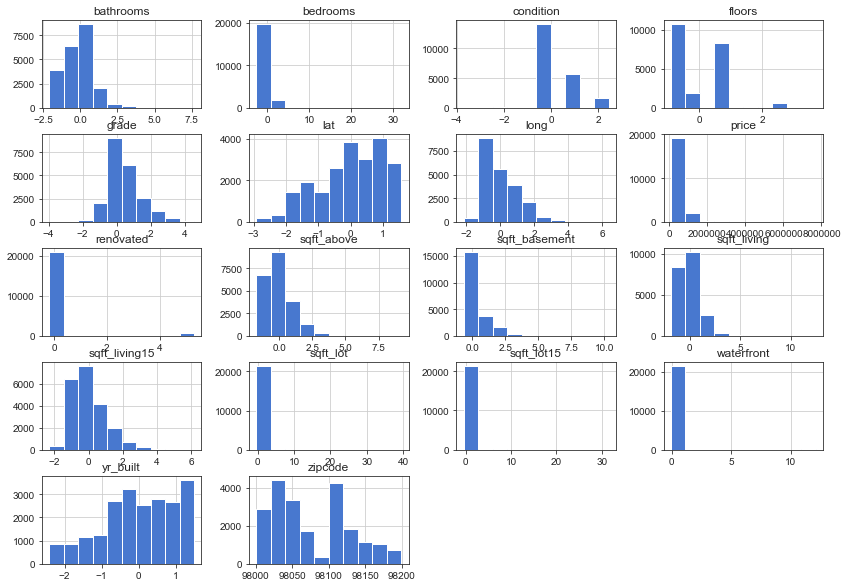

In [29]:
data.hist(figsize = (14,10))
plt.show()

### Removing Outliers

Let's take a more detailed look at all the different categories when plotted against our target variable, price.

In [30]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, data.price.quantile(q=q)))

0.8 percentile: 700435.9999999998
0.81 percentile: 718000.0
0.82 percentile: 730000.72
0.83 percentile: 749950.0
0.84 percentile: 760003.2
0.85 percentile: 779721.9999999991
0.86 percentile: 799000.0
0.87 percentile: 815000.0
0.88 percentile: 836739.9999999998
0.89 percentile: 859967.6
0.9 percentile: 887000.0
0.91 percentile: 919993.6
0.92 percentile: 950000.0
0.93 percentile: 997964.0000000002
0.94 percentile: 1060000.0
0.95 percentile: 1160000.0
0.96 percentile: 1260000.0
0.97 percentile: 1390000.0
0.98 percentile: 1600000.0
0.99 percentile: 1970000.0


Now we know that the upper 1% of prices are houses over $1,970,000. We will remove these high priced outliers and see if this improves our distribution.

In [31]:
orig_tot = len(data)
data = data[data.price < 1970000] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(data))/orig_tot)

Percent removed: 0.010047691809047552


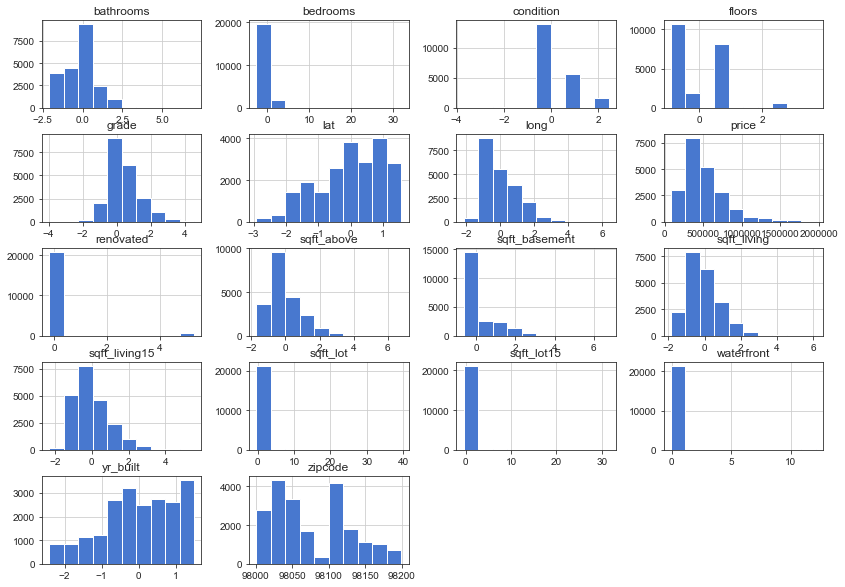

In [32]:
data.hist(figsize = (14,10))
plt.show()

Now our histograms are looking much more normal, though not totally normal yet.

### Jointplot - Checking for linearity

Let's take a more detailed look at all the different categories when plotted against our target variable, price.

In [33]:
# relcols = ['bathrooms', 'bedrooms','condition', 'floors', 'grade', 'lat', 'long', 'renovated', 'sqft_above', 
#            'sqft_basement', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'waterfront', 'yr_built', 'zipcode']

# for col in relcols:
#     sns.jointplot(x = col, y = 'price', data = data, kind = 'reg')
#     plt.ylabel('Price')
#     plt.title(col)
#     plt.show()

These jointplots give us an idea of the distribution of data and provide us with some nice visuals we can use later to show individual features to stakeholders.

### One-hot Encoding Categorical Variables

Looking for catagorical variables to one-hot encode:

While we stated above that condition, floors, and grade were all likely categorical after looking them further it seems more likely that these features are still numeric and not necessary to change. This leaves zipcode as our diffinitively categorical variable.

Taking categorical variables and changing them to category type before one-hot encoding.

In [34]:
cat_feats = ['zipcode']
cat_feats_df = data[cat_feats]
cat_feats_df = cat_feats_df.astype('category')
cat_feats_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21380 entries, 0 to 21596
Data columns (total 1 columns):
zipcode    21380 non-null category
dtypes: category(1)
memory usage: 191.0 KB


Now creating dummy variables and dropping the first column to ensure no dummy variable trap.

In [35]:
cat_feats_df = pd.get_dummies(cat_feats_df, drop_first=True)
cat_feats_df.head()

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now removing the original zipcode column and adding the newly created columns to the original dataframe.

In [36]:
data = data.drop(['zipcode'], axis=1)
data= pd.concat([data, cat_feats_df], axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,-0.402894,-1.451039,-0.980629,-0.228177,-0.915531,-0.082498,-0.629972,-0.560787,-0.735234,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,-0.402894,0.174482,0.533357,-0.189735,0.937409,-0.082498,-0.629972,-0.560787,0.460766,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,-1.482459,-1.451039,-1.427201,-0.123137,-0.915531,-0.082498,-0.629972,-1.413157,-1.230546,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,0.676671,1.149794,-0.131054,-0.243873,-0.915531,-0.082498,2.444371,-0.560787,-0.892284,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,-0.402894,-0.150622,-0.436030,-0.169499,-0.915531,-0.082498,-0.629972,0.291583,-0.131194,...,0,0,0,0,0,0,0,0,0,0


### Log Tranformation

Our data still has some outliers on price and linearity seems to be less reliable as prices increase. A log tranformation will help bring the data more in line with normal.

In [37]:
data.price = data.price.map(np.log) #log transform price...

# Fitting the model

## Making a hypothesis

Before we get a model we should have an idea what we are expecting to see as well as a null hypothesis that we are hoping to reject.

In our case, our expectation is that changes in the values of our columns will correllate to changes in our housing prices. 

In order to be more exact in our hypotheis we will choose a stardard value for 𝛼, .05. Meaning that we will only reject the null hypothesis if there is less than a 5% chance our observed changes came from random chance.

Therefore our null hypothesis would be that changes in our features do not effect price.

### Hypothesis

𝐻1: Predicted data ≠ μ (mean)

𝐻0: Predicted data = μ (mean)

## Train/Test Split

Now ready to remove the outcome (price) and train the model by splitting out train/test data points.

In [38]:
outcome = 'price'
x_cols = list(data.columns)
x_cols.remove(outcome)

In [39]:
train, test = train_test_split(data)

In [40]:
print(len(train), len(test))
train.head()

16035 5345


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
5637,13.235692,1.756237,0.499586,0.359085,-0.148250,-0.915531,-0.082498,2.444371,-0.560787,-0.227840,...,0,0,0,0,0,0,0,0,0,0
10418,13.369223,-0.402894,0.499586,0.369977,-0.165539,0.937409,-0.082498,-0.629972,1.996322,0.762786,...,0,0,0,0,0,0,0,0,0,0
4721,12.957489,-0.402894,-0.475727,-0.708330,-0.199973,-0.915531,-0.082498,2.444371,-0.560787,-0.433214,...,0,0,0,0,0,0,0,0,0,0
6416,13.377006,0.676671,0.499586,0.762089,-0.263190,0.937409,-0.082498,-0.629972,0.291583,1.197694,...,0,0,0,0,0,0,0,0,0,0
10489,12.873902,-0.402894,-0.475727,-0.980629,0.035076,-0.915531,-0.082498,0.907199,-0.560787,-0.735234,...,0,0,0,0,0,0,0,0,0,0


## Fitting the model to the train data

In [41]:
predictors = '+'.join(x_cols)
#predictors = predictors.replace('zipcode', 'C(zipcode)')
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
print(formula)
model.summary()

price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+condition+grade+sqft_above+sqft_basement+yr_built+renovated+lat+long+sqft_living15+sqft_lot15+zipcode_98002+zipcode_98003+zipcode_98004+zipcode_98005+zipcode_98006+zipcode_98007+zipcode_98008+zipcode_98010+zipcode_98011+zipcode_98014+zipcode_98019+zipcode_98022+zipcode_98023+zipcode_98024+zipcode_98027+zipcode_98028+zipcode_98029+zipcode_98030+zipcode_98031+zipcode_98032+zipcode_98033+zipcode_98034+zipcode_98038+zipcode_98039+zipcode_98040+zipcode_98042+zipcode_98045+zipcode_98052+zipcode_98053+zipcode_98055+zipcode_98056+zipcode_98058+zipcode_98059+zipcode_98065+zipcode_98070+zipcode_98072+zipcode_98074+zipcode_98075+zipcode_98077+zipcode_98092+zipcode_98102+zipcode_98103+zipcode_98105+zipcode_98106+zipcode_98107+zipcode_98108+zipcode_98109+zipcode_98112+zipcode_98115+zipcode_98116+zipcode_98117+zipcode_98118+zipcode_98119+zipcode_98122+zipcode_98125+zipcode_98126+zipcode_98133+zipcode_98136+zipcode_98144+zipcode_98146+zi

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     1162.
Date:                Thu, 20 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:13:50   Log-Likelihood:                 4233.0
No. Observations:               16035   AIC:                            -8294.
Df Residuals:                   15949   BIC:                            -7633.
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.7128      0.025    515.677      0.000      12.664      12.761
bedrooms         -0.0012      0.002     -0.612      0.541      -0.005       0.003
bathrooms         0.0330      0.003     11.929      0.000       0.028       0.038
sqft_living       0.1363      0.020      6.741      0.000       0.097       0.176
sqft_lot          0.0287      0.002     13.010      0.000       0.024       0.033
floors           -0.0130      0.002     -5.599      0.000      -0.018      -0.008
waterfront        0.0519      0.002     29.365      0.000       0.048       0.055
condition         0.0367      0.002     21.802      0.000       0.033       0.040
grade             0.1092      0.003     37.826      0.000       0.104       0.115
sqft_above        0.0425      0.018      2.339      0.019       0.007       0.078
sqft_basement    -0.0016      0.010     -0.163      0.870      -0.020       0.017
yr_built         -0.0187      0.003     -7.362      0.000      -0.024      -0.014
renovated         0.0152      0.002      9.726      0.000       0.012       0.018
lat               0.0763      0.012      6.471      0.000       0.053       0.099
long             -0.0452      0.009     -5.209      0.000      -0.062      -0.028
sqft_living15     0.0700      0.003     26.037      0.000       0.065       0.075
sqft_lot15        0.0014      0.002      0.640      0.522      -0.003       0.006
zipcode_98002    -0.0184      0.019     -0.961      0.336      -0.056       0.019
zipcode_98003    -0.0057      0.017     -0.334      0.739      -0.039       0.028
zipcode_98004     0.9176      0.032     28.763      0.000       0.855       0.980
zipcode_98005     0.5575      0.034     16.316      0.000       0.490       0.624
zipcode_98006     0.5100      0.028     18.449      0.000       0.456       0.564
zipcode_98007     0.4931      0.035     13.989      0.000       0.424       0.562
zipcode_98008     0.5194      0.033     15.557      0.000       0.454       0.585
zipcode_98010     0.3154      0.030     10.594      0.000       0.257       0.374
zipcode_98011     0.2007      0.043      4.645      0.000       0.116       0.285
zipcode_98014     0.2438      0.047      5.170      0.000       0.151       0.336
zipcode_98019     0.1736      0.047      3.729      0.000       0.082       0.265
zipcode_98022     0.2052      0.026      8.020      0.000       0.155       0.255
zipcode_98023    -0.0709      0.016     -4.515      0.000      -0.102      -0.040
zipcode_98024     0.3897      0.042      9.360      0.000       0.308       0.471
zipcode_98027     0.4385      0.028     15.517      0.000       0.383       0.494
zipcode_98028     0.1723      0.042      4.117      0.000       0.090       0.254
zipcode_98029     0.5266      0.032     16.273      0.000       0.463       0.590
zipcode_98030     0.0386      0.019      2.040   

Whew! We have our first model and our R2 is pretty strong at .86. However, we have many columns that are not meeting our target 𝛼 of .05. We therefore can't be confident that these predictors are not simply a result of random chance.

## Removing non-influencial features

Our R2 score is not too bad, but we have lots of columns and many have far too high of a P score.

Let's remove any column that has a p score over .05. In other words any column that is unlikely to be cotributing to our final predictions.

In [42]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

86 77
['bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,12.7128,0.025,515.677,0.000,12.664,12.761
bedrooms,-0.0012,0.002,-0.612,0.541,-0.005,0.003
bathrooms,0.0330,0.003,11.929,0.000,0.028,0.038
sqft_living,0.1363,0.020,6.741,0.000,0.097,0.176
sqft_lot,0.0287,0.002,13.010,0.000,0.024,0.033


We have removed all columns with P value over .05. Let's see if our model remains predictive with these columns removed.

In [43]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
print(formula)
model.summary()

price~bathrooms+sqft_living+sqft_lot+floors+waterfront+condition+grade+sqft_above+yr_built+renovated+lat+long+sqft_living15+zipcode_98004+zipcode_98005+zipcode_98006+zipcode_98007+zipcode_98008+zipcode_98010+zipcode_98011+zipcode_98014+zipcode_98019+zipcode_98022+zipcode_98023+zipcode_98024+zipcode_98027+zipcode_98028+zipcode_98029+zipcode_98030+zipcode_98031+zipcode_98032+zipcode_98033+zipcode_98034+zipcode_98038+zipcode_98039+zipcode_98040+zipcode_98042+zipcode_98045+zipcode_98052+zipcode_98053+zipcode_98055+zipcode_98056+zipcode_98058+zipcode_98059+zipcode_98065+zipcode_98070+zipcode_98072+zipcode_98074+zipcode_98075+zipcode_98077+zipcode_98092+zipcode_98102+zipcode_98103+zipcode_98105+zipcode_98106+zipcode_98107+zipcode_98108+zipcode_98109+zipcode_98112+zipcode_98115+zipcode_98116+zipcode_98117+zipcode_98118+zipcode_98119+zipcode_98122+zipcode_98125+zipcode_98126+zipcode_98133+zipcode_98136+zipcode_98144+zipcode_98146+zipcode_98155+zipcode_98166+zipcode_98168+zipcode_98177+zipcode_

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     1283.
Date:                Thu, 20 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:13:51   Log-Likelihood:                 4229.7
No. Observations:               16035   AIC:                            -8303.
Df Residuals:                   15957   BIC:                            -7704.
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.7333      0.017    746.011      0.000      12.700      12.767
bathrooms         0.0326      0.003     12.037      0.000       0.027       0.038
sqft_living       0.1324      0.004     30.589      0.000       0.124       0.141
sqft_lot          0.0298      0.002     17.634      0.000       0.026       0.033
floors           -0.0130      0.002     -5.601      0.000      -0.018      -0.008
waterfront        0.0520      0.002     29.562      0.000       0.049       0.055
condition         0.0365      0.002     21.754      0.000       0.033       0.040
grade             0.1095      0.003     38.291      0.000       0.104       0.115
sqft_above        0.0453      0.004     11.069      0.000       0.037       0.053
yr_built         -0.0187      0.003     -7.406      0.000      -0.024      -0.014
renovated         0.0152      0.002      9.762      0.000       0.012       0.018
lat               0.0882      0.010      9.175      0.000       0.069       0.107
long             -0.0489      0.008     -5.952      0.000      -0.065      -0.033
sqft_living15     0.0703      0.003     26.229      0.000       0.065       0.076
zipcode_98004     0.8923      0.025     36.095      0.000       0.844       0.941
zipcode_98005     0.5334      0.028     19.221      0.000       0.479       0.588
zipcode_98006     0.4912      0.021     22.967      0.000       0.449       0.533
zipcode_98007     0.4694      0.029     16.152      0.000       0.412       0.526
zipcode_98008     0.4961      0.027     18.584      0.000       0.444       0.548
zipcode_98010     0.3209      0.028     11.520      0.000       0.266       0.375
zipcode_98011     0.1634      0.034      4.790      0.000       0.097       0.230
zipcode_98014     0.2248      0.041      5.445      0.000       0.144       0.306
zipcode_98019     0.1453      0.039      3.720      0.000       0.069       0.222
zipcode_98022     0.2213      0.023      9.424      0.000       0.175       0.267
zipcode_98023    -0.0738      0.013     -5.885      0.000      -0.098      -0.049
zipcode_98024     0.3789      0.038     10.089      0.000       0.305       0.453
zipcode_98027     0.4263      0.023     18.284      0.000       0.381       0.472
zipcode_98028     0.1340      0.032      4.155      0.000       0.071       0.197
zipcode_98029     0.5115      0.027     18.861      0.000       0.458       0.565
zipcode_98030     0.0348      0.016      2.214      0.027       0.004       0.066
zipcode_98031     0.0383      0.016      2.383      0.017       0.007       0.070
zipcode_98032    -0.1080      0.021     -5.183      0.000      -0.149      -0.067
zipcode_98033     0.5459      0.027     19.871      0.000       0.492       0.600
zipcode_98034     0.2856      0.029      9.783      0.000       0.228       0.343
zipcode_98038     0.1993      0.018     10.823   

Great! Our R2 remains unchanged and this time we have no P values over .05 so another round of feature selection is unnecessary.

In [44]:
# summary = model.summary()
# p_table = summary.tables[1]
# p_table = pd.DataFrame(p_table.data)
# p_table.columns = p_table.iloc[0]
# p_table = p_table.drop(0)
# p_table = p_table.set_index(p_table.columns[0])
# p_table['P>|t|'] = p_table['P>|t|'].astype(float)
# x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
# x_cols.remove('Intercept')
# print(len(p_table), len(x_cols))
# print(x_cols[:5])
# p_table.head()

In [45]:
# predictors = '+'.join(x_cols)
# formula = outcome + '~' + predictors
# model = ols(formula=formula, data=train).fit()
# print(formula)
# model.summary()

After 2 rounds (only one was necessary) of removing non-influential columns lets got on to check for multicollinearity.

## Checking for Multicollinearity

### Using variance inflation factor to remove multicollinear features.

Finding out each columns VIF score.

In [46]:
X = data[x_cols]
X = sm.add_constant(X)
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


[('bathrooms', 132.27750003148887),
 ('sqft_living', 3.159082586516924),
 ('sqft_lot', 7.494446835257744),
 ('floors', 1.2203772219097317),
 ('waterfront', 2.4595186310440025),
 ('condition', 1.0606690146803786),
 ('grade', 1.3019135021919988),
 ('sqft_above', 3.5414992558003315),
 ('yr_built', 7.033208919090047),
 ('renovated', 2.949774511298617),
 ('lat', 1.1295412685196538),
 ('long', 42.89234444239727),
 ('sqft_living15', 30.87468042484452),
 ('zipcode_98004', 3.141565852791494),
 ('zipcode_98005', 3.520135228413057),
 ('zipcode_98006', 2.6398400140825236),
 ('zipcode_98007', 4.611233041933238),
 ('zipcode_98008', 2.4454887706085535),
 ('zipcode_98010', 4.070184473418124),
 ('zipcode_98011', 1.6455250384135267),
 ('zipcode_98014', 4.730051443247062),
 ('zipcode_98019', 4.548737735007746),
 ('zipcode_98022', 6.173991879084698),
 ('zipcode_98023', 2.774895053265126),
 ('zipcode_98024', 1.698171606112263),
 ('zipcode_98027', 2.412990503522158),
 ('zipcode_98028', 4.672044935406254),
 

Remove VIF scores higher than 5

In [47]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

77 53


Refitting the model

In [48]:
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
print(formula)
model.summary()

price~sqft_living+floors+waterfront+condition+grade+sqft_above+renovated+lat+zipcode_98004+zipcode_98005+zipcode_98006+zipcode_98007+zipcode_98008+zipcode_98010+zipcode_98011+zipcode_98014+zipcode_98019+zipcode_98023+zipcode_98024+zipcode_98027+zipcode_98028+zipcode_98030+zipcode_98031+zipcode_98032+zipcode_98033+zipcode_98039+zipcode_98040+zipcode_98042+zipcode_98045+zipcode_98056+zipcode_98058+zipcode_98059+zipcode_98065+zipcode_98072+zipcode_98102+zipcode_98103+zipcode_98106+zipcode_98107+zipcode_98108+zipcode_98109+zipcode_98112+zipcode_98115+zipcode_98117+zipcode_98119+zipcode_98122+zipcode_98125+zipcode_98133+zipcode_98144+zipcode_98146+zipcode_98155+zipcode_98168+zipcode_98177+zipcode_98199


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     1386.
Date:                Thu, 20 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:13:58   Log-Likelihood:                 2223.7
No. Observations:               16035   AIC:                            -4339.
Df Residuals:                   15981   BIC:                            -3925.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.0346      0.003   4490.977      0.000      13.029      13.040
sqft_living       0.1919      0.004     47.157      0.000       0.184       0.200
floors           -0.0039      0.002     -1.714      0.086      -0.008       0.001
waterfront        0.0552      0.002     28.296      0.000       0.051       0.059
condition         0.0448      0.002     24.941      0.000       0.041       0.048
grade             0.1373      0.003     47.159      0.000       0.132       0.143
sqft_above        0.0305      0.004      7.034      0.000       0.022       0.039
renovated         0.0231      0.002     13.698      0.000       0.020       0.026
lat               0.2022      0.003     77.972      0.000       0.197       0.207
zipcode_98004     0.5672      0.015     36.981      0.000       0.537       0.597
zipcode_98005     0.2053      0.020     10.232      0.000       0.166       0.245
zipcode_98006     0.1864      0.012     16.005      0.000       0.164       0.209
zipcode_98007     0.1022      0.021      4.756      0.000       0.060       0.144
zipcode_98008     0.1170      0.016      7.495      0.000       0.086       0.148
zipcode_98010     0.1560      0.025      6.297      0.000       0.107       0.205
zipcode_98011    -0.2853      0.019    -15.132      0.000      -0.322      -0.248
zipcode_98014    -0.2351      0.022    -10.709      0.000      -0.278      -0.192
zipcode_98019    -0.3579      0.018    -19.455      0.000      -0.394      -0.322
zipcode_98023    -0.1188      0.012    -10.144      0.000      -0.142      -0.096
zipcode_98024     0.0530      0.027      1.946      0.052      -0.000       0.106
zipcode_98027     0.1221      0.012      9.880      0.000       0.098       0.146
zipcode_98028    -0.3061      0.016    -19.291      0.000      -0.337      -0.275
zipcode_98030    -0.1182      0.016     -7.599      0.000      -0.149      -0.088
zipcode_98031    -0.1412      0.015     -9.310      0.000      -0.171      -0.111
zipcode_98032    -0.2525      0.023    -11.058      0.000      -0.297      -0.208
zipcode_98033     0.1367      0.013     10.910      0.000       0.112       0.161
zipcode_98039     0.7211      0.043     16.657      0.000       0.636       0.806
zipcode_98040     0.4162      0.015     27.414      0.000       0.386       0.446
zipcode_98042    -0.1098      0.011    -10.034      0.000      -0.131      -0.088
zipcode_98045     0.0377      0.016      2.304      0.021       0.006       0.070
zipcode_98056    -0.0755      0.012     -6.096      0.000      -0.100      -0.051
zipcode_98058    -0.1234      0.012    -10.437      0.000      -0.147      -0.100
zipcode_98059    -0.0104      0.012     -0.891      0.373      -0.033       0.012
zipcode_98065     0.0256      0.014      1.772      0.076      -0.003       0.054
zipcode_98072    -0.2295      0.016    -14.626   

### Another check to remove high p scores

We lost a few columns due to multicollinearity, but our R2 score remains fairly high at .82. Looking at our model again, it does seem like some additional columns are showing too high of a p score. Let's run another round checking for that .05 cutoff.

In [49]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table

54 49
['sqft_living', 'waterfront', 'condition', 'grade', 'sqft_above']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,13.0346,0.003,4490.977,0.000,13.029,13.040
sqft_living,0.1919,0.004,47.157,0.000,0.184,0.200
floors,-0.0039,0.002,-1.714,0.086,-0.008,0.001
waterfront,0.0552,0.002,28.296,0.000,0.051,0.059
condition,0.0448,0.002,24.941,0.000,0.041,0.048
grade,0.1373,0.003,47.159,0.000,0.132,0.143
sqft_above,0.0305,0.004,7.034,0.000,0.022,0.039
renovated,0.0231,0.002,13.698,0.000,0.020,0.026
lat,0.2022,0.003,77.972,0.000,0.197,0.207


In [50]:
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
print(formula)
model.summary()

price~sqft_living+waterfront+condition+grade+sqft_above+renovated+lat+zipcode_98004+zipcode_98005+zipcode_98006+zipcode_98007+zipcode_98008+zipcode_98010+zipcode_98011+zipcode_98014+zipcode_98019+zipcode_98023+zipcode_98027+zipcode_98028+zipcode_98030+zipcode_98031+zipcode_98032+zipcode_98033+zipcode_98039+zipcode_98040+zipcode_98042+zipcode_98045+zipcode_98056+zipcode_98058+zipcode_98072+zipcode_98102+zipcode_98103+zipcode_98106+zipcode_98107+zipcode_98108+zipcode_98109+zipcode_98112+zipcode_98115+zipcode_98117+zipcode_98119+zipcode_98122+zipcode_98125+zipcode_98133+zipcode_98144+zipcode_98146+zipcode_98155+zipcode_98168+zipcode_98177+zipcode_98199


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     1499.
Date:                Thu, 20 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:13:58   Log-Likelihood:                 2218.3
No. Observations:               16035   AIC:                            -4337.
Df Residuals:                   15985   BIC:                            -3953.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.0357      0.003   4685.785      0.000      13.030      13.041
sqft_living       0.1939      0.004     49.483      0.000       0.186       0.202
waterfront        0.0552      0.002     28.270      0.000       0.051       0.059
condition         0.0451      0.002     25.491      0.000       0.042       0.049
grade             0.1359      0.003     47.567      0.000       0.130       0.142
sqft_above        0.0278      0.004      7.156      0.000       0.020       0.035
renovated         0.0231      0.002     13.701      0.000       0.020       0.026
lat               0.2027      0.003     78.281      0.000       0.198       0.208
zipcode_98004     0.5677      0.015     37.112      0.000       0.538       0.598
zipcode_98005     0.2066      0.020     10.329      0.000       0.167       0.246
zipcode_98006     0.1867      0.012     16.075      0.000       0.164       0.209
zipcode_98007     0.1017      0.021      4.735      0.000       0.060       0.144
zipcode_98008     0.1175      0.016      7.548      0.000       0.087       0.148
zipcode_98010     0.1561      0.025      6.304      0.000       0.108       0.205
zipcode_98011    -0.2868      0.019    -15.225      0.000      -0.324      -0.250
zipcode_98014    -0.2364      0.022    -10.776      0.000      -0.279      -0.193
zipcode_98019    -0.3606      0.018    -19.641      0.000      -0.397      -0.325
zipcode_98023    -0.1180      0.012    -10.114      0.000      -0.141      -0.095
zipcode_98027     0.1205      0.012      9.782      0.000       0.096       0.145
zipcode_98028    -0.3074      0.016    -19.399      0.000      -0.338      -0.276
zipcode_98030    -0.1187      0.016     -7.643      0.000      -0.149      -0.088
zipcode_98031    -0.1417      0.015     -9.359      0.000      -0.171      -0.112
zipcode_98032    -0.2521      0.023    -11.048      0.000      -0.297      -0.207
zipcode_98033     0.1359      0.013     10.866      0.000       0.111       0.160
zipcode_98039     0.7220      0.043     16.682      0.000       0.637       0.807
zipcode_98040     0.4164      0.015     27.481      0.000       0.387       0.446
zipcode_98042    -0.1102      0.011    -10.102      0.000      -0.132      -0.089
zipcode_98045     0.0375      0.016      2.298      0.022       0.006       0.070
zipcode_98056    -0.0764      0.012     -6.188      0.000      -0.101      -0.052
zipcode_98058    -0.1234      0.012    -10.464      0.000      -0.147      -0.100
zipcode_98072    -0.2302      0.016    -14.696      0.000      -0.261      -0.199
zipcode_98102     0.3339      0.025     13.532      0.000       0.286       0.382
zipcode_98103     0.1473      0.011     13.610      0.000       0.126       0.169
zipcode_98106    -0.1195      0.014     -8.655      0.000      -0.147      -0.092
zipcode_98107     0.1731      0.015     11.430   

## Normality Check

Our model is still in good shape after these checks. Let's do some quick checks into normality and homoscedasticity to make sure our residuals aren't too far outside of normal, or patterned in a way that an alternative model might be more efffective.

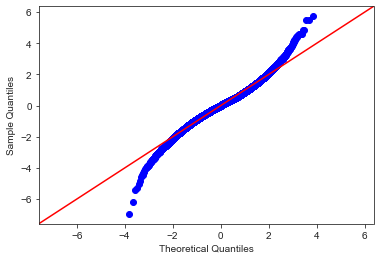

In [51]:
model_resid = model.resid
fig = sm.graphics.qqplot(model_resid, dist=stats.norm, line='45', fit=True)

The log tranform really helps with normality. In our case we still have some abnormality at high and low price values, but especially within quantiles -2 through 2 our data is looking pretty good.

Future models might look at breaking out predictions for high and low values and removing those factors from the model. In this case I think it's better to keep our outlier elmination to only removing 1% of data.

## Homoscedasticity Check

We are looking to see if there are any obvious patterns to where our errors occur. A generally shapeless blob is the goal here.

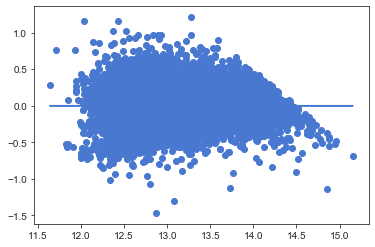

In [52]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

Good news, it looks like there might be some funneling toward the higher prices, but there is no strong hetroscedasticity.

In [53]:
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=test).fit()
print(formula)
model.summary()

price~sqft_living+waterfront+condition+grade+sqft_above+renovated+lat+zipcode_98004+zipcode_98005+zipcode_98006+zipcode_98007+zipcode_98008+zipcode_98010+zipcode_98011+zipcode_98014+zipcode_98019+zipcode_98023+zipcode_98027+zipcode_98028+zipcode_98030+zipcode_98031+zipcode_98032+zipcode_98033+zipcode_98039+zipcode_98040+zipcode_98042+zipcode_98045+zipcode_98056+zipcode_98058+zipcode_98072+zipcode_98102+zipcode_98103+zipcode_98106+zipcode_98107+zipcode_98108+zipcode_98109+zipcode_98112+zipcode_98115+zipcode_98117+zipcode_98119+zipcode_98122+zipcode_98125+zipcode_98133+zipcode_98144+zipcode_98146+zipcode_98155+zipcode_98168+zipcode_98177+zipcode_98199


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     504.4
Date:                Thu, 20 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:14:00   Log-Likelihood:                 756.51
No. Observations:                5345   AIC:                            -1413.
Df Residuals:                    5295   BIC:                            -1084.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.0321      0.005   2745.076      0.000      13.023      13.041
sqft_living       0.1920      0.007     28.906      0.000       0.179       0.205
waterfront        0.0551      0.004     14.427      0.000       0.048       0.063
condition         0.0501      0.003     16.281      0.000       0.044       0.056
grade             0.1448      0.005     28.718      0.000       0.135       0.155
sqft_above        0.0245      0.007      3.668      0.000       0.011       0.038
renovated         0.0170      0.003      5.409      0.000       0.011       0.023
lat               0.2028      0.005     44.531      0.000       0.194       0.212
zipcode_98004     0.5346      0.025     21.306      0.000       0.485       0.584
zipcode_98005     0.1979      0.030      6.666      0.000       0.140       0.256
zipcode_98006     0.1649      0.020      8.174      0.000       0.125       0.205
zipcode_98007     0.1223      0.033      3.700      0.000       0.057       0.187
zipcode_98008     0.1373      0.024      5.774      0.000       0.091       0.184
zipcode_98010     0.1220      0.043      2.839      0.005       0.038       0.206
zipcode_98011    -0.2710      0.029     -9.378      0.000      -0.328      -0.214
zipcode_98014    -0.3282      0.041     -8.094      0.000      -0.408      -0.249
zipcode_98019    -0.3535      0.032    -11.026      0.000      -0.416      -0.291
zipcode_98023    -0.1177      0.022     -5.413      0.000      -0.160      -0.075
zipcode_98027     0.1110      0.022      5.085      0.000       0.068       0.154
zipcode_98028    -0.3180      0.025    -12.839      0.000      -0.367      -0.269
zipcode_98030    -0.1108      0.028     -3.948      0.000      -0.166      -0.056
zipcode_98031    -0.1838      0.026     -7.050      0.000      -0.235      -0.133
zipcode_98032    -0.1704      0.035     -4.825      0.000      -0.240      -0.101
zipcode_98033     0.1681      0.022      7.662      0.000       0.125       0.211
zipcode_98039     0.7139      0.095      7.547      0.000       0.528       0.899
zipcode_98040     0.4252      0.029     14.442      0.000       0.367       0.483
zipcode_98042    -0.0983      0.020     -4.832      0.000      -0.138      -0.058
zipcode_98045     0.0093      0.031      0.302      0.763      -0.051       0.070
zipcode_98056    -0.0683      0.022     -3.091      0.002      -0.112      -0.025
zipcode_98058    -0.1345      0.020     -6.585      0.000      -0.174      -0.094
zipcode_98072    -0.2181      0.027     -8.153      0.000      -0.270      -0.166
zipcode_98102     0.3564      0.044      8.184      0.000       0.271       0.442
zipcode_98103     0.1489      0.019      8.015      0.000       0.112       0.185
zipcode_98106    -0.1167      0.023     -5.050      0.000      -0.162      -0.071
zipcode_98107     0.1960      0.030      6.559   

## Cross-Validation (ish)

Let's try using our model that we trained on the train data and use the test data instead. Idealy, we will have very similar R2 scores. Note: we don't really want to see higher R2 scores with the test, since that would imply there is something non-replicable with our model.

In [54]:
r2_train = r2_score(train['price'],model.predict(train))
print(f'Training Data R-Squared = {round(r2_train,3)}')


r2_test = r2_score(test['price'],model.predict(test))
print(f'Test Data R-Squared = {round(r2_test,3)}')


Training Data R-Squared = 0.819
Test Data R-Squared = 0.824


Our test data R2 was very similar to the train data R2, so it looks like a success.

Now that we have a model that we are comfortable with, it is time to analyse our results in order to make useful recommendations to stakeholders.

# Analysis

We have a model that accounts for around 82% of housing price fluctuations using our selected features. But what are those features and how can we make useful insights for stakeholders with them? Let's go back to our 3 central questions.

##  What are the most salient features of a house that can be changed in order to impact sale price?

Let's take the features that became our predicitive linear formula and sort them by how much each feature impacts the final model. 

In [55]:
model.params.sort_values()

zipcode_98019    -0.353525
zipcode_98014    -0.328173
zipcode_98028    -0.317994
zipcode_98155    -0.315712
zipcode_98168    -0.297995
zipcode_98011    -0.270984
zipcode_98133    -0.261554
zipcode_98072    -0.218055
zipcode_98031    -0.183812
zipcode_98032    -0.170429
zipcode_98125    -0.141895
zipcode_98058    -0.134450
zipcode_98023    -0.117736
zipcode_98106    -0.116696
zipcode_98030    -0.110791
zipcode_98108    -0.101012
zipcode_98042    -0.098307
zipcode_98146    -0.086314
zipcode_98056    -0.068272
zipcode_98177    -0.059391
zipcode_98045     0.009308
renovated         0.017014
sqft_above        0.024487
condition         0.050136
waterfront        0.055096
zipcode_98027     0.110998
zipcode_98144     0.120391
zipcode_98010     0.121978
zipcode_98007     0.122272
zipcode_98117     0.123368
zipcode_98008     0.137282
grade             0.144810
zipcode_98103     0.148905
zipcode_98115     0.163551
zipcode_98006     0.164945
zipcode_98033     0.168050
sqft_living       0.192030
z

This can seem inscrutable, but we know that all features related to zipcode are not something our home owners can change, latitude is similarly immutable. So that makes sqft_living the most significant, changeable, feature of our home price model, followed by grade and condition.

These are very useful insights because they are a good combination of expected (square footage increases lead to an increase in home price) and less expected (2 subjective rating categories).

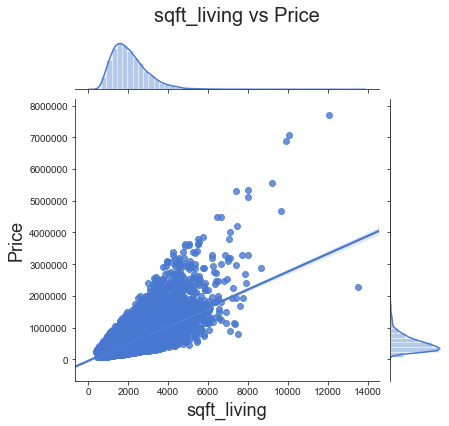

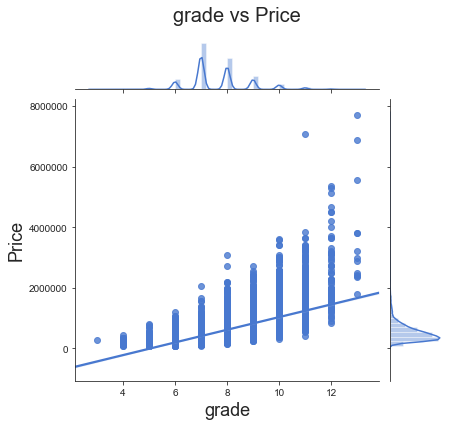

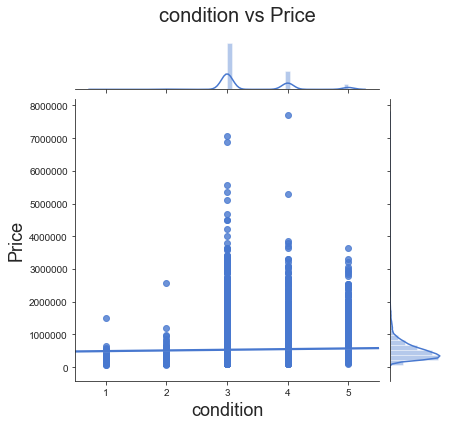

In [56]:
mutable_cols = ['sqft_living','grade', 'condition']

for col in mutable_cols:
    plt.rcParams["axes.labelsize"] = 18
    sns.jointplot(x = col, y = 'price', data = data_not_normal, kind = 'reg')
    plt.ylabel('Price', fontsize=18)
    plt.subplots_adjust(top=0.9)
    plt.suptitle(col + ' vs Price', fontsize=20)
    plt.show()

The grade feature is very interesting as it is a grade given by the King's County Grading system, and could conceivibly be changed as the house is improved by a home owner. Condition is similar in that it is a subjective rating system. For both of these options, the stakeholder knows that home improvements that would change the condition of the home or how it would be graded could significantly impact price. 

##  Which immutable features of the house (location, year built) will most drastically impact sale price?

As we saw when sorting our parameters, features related to location were extrememely important. Specifically the zipcodes:98039 and 98004 were strongly correllated with higher property values while 98019 and 98133 were correllated with the lower property values.

Latitude and Waterfront properties were also correllated with higher property values.

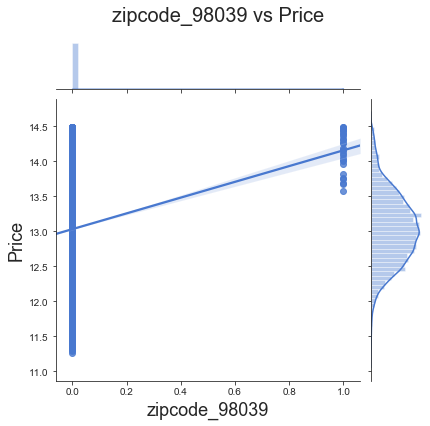

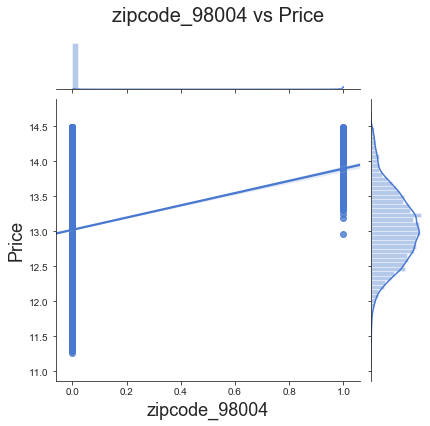

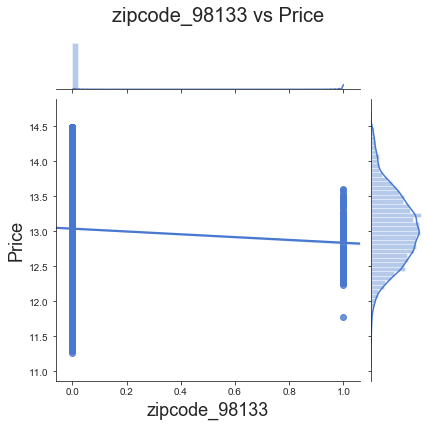

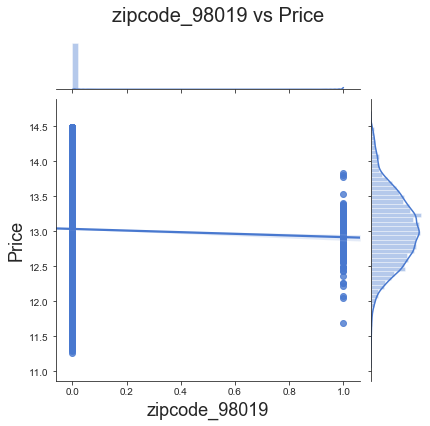

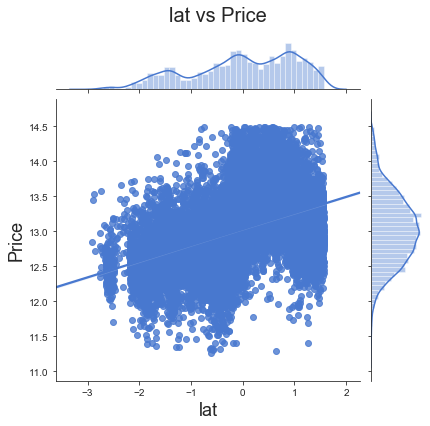

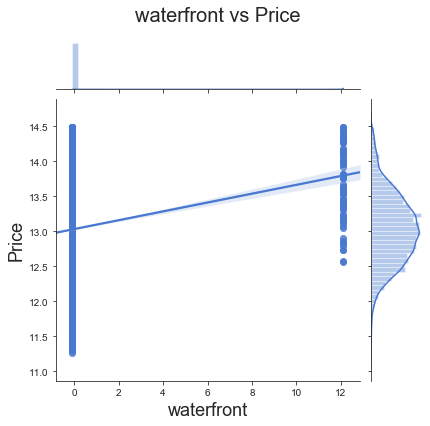

In [59]:
immutable_cols = ['zipcode_98039','zipcode_98004', 'zipcode_98133', 'zipcode_98019', 'lat', 'waterfront']
for col in immutable_cols:
    plt.rcParams["axes.labelsize"] = 18
    sns.jointplot(x = col, y = 'price', data = data, kind = 'reg')
    plt.ylabel('Price', fontsize=18)
    plt.subplots_adjust(top=0.9)
    plt.suptitle(col + ' vs Price', fontsize=20)
    plt.show()

While our stakeholders can't change these facets of their property, they can be aware that these immutable features are going to play a role in their home sale price and will help explain whether they should attempt to sell for a premium if they are in a preferred zipcode or accept less if they live in a non-preferred zipcode.

## Will investment in the aspects of the house that are changible be cost effective?

In [60]:
data_not_normal.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,3.409825,7.657915,1788.596842,285.716581,1970.999676,0.034449,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.650546,1.173200,827.759761,439.819830,29.375234,0.182384,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,1.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


The good news for this section is that those features of the model that can be changed offer a wide variety of options. 

While it is somewhat common knowledge, adding squarefootage is the most direct feature that can impact sale price. According to our model an increase of 1 standard deviation of square footage (918 sqft) will result in a 18% increase in property value.  For a 500000 dollar house this would be a $9000 increase in value.

The Condition and Grade features are harder to exactly quantify because they rely on a subjective rating, but the King's County website explains that the grade feature looks into quality of construction, quality of materials and overall workmanship on the house. Combining this with what we know about square footage, it is more worthwhile to have high quality expansion work done because this would see an increase to all 3 important features instead of just one.

# Conclusion

We have created a model that does a good job of predicting home prices given a sample set of data and features. For our stakeholders, the model is able to recommed features that can be changed in a home to increase value (SqFt living, Grade, Condition) while also identifying that there is no magic bullet as property values a still significantly impacted by unchangable aspects of the property. High value zipcodes, position and waterfront property still command higher prices.

These recommendations would be even more significant for a stakeholder looking to buy a house, or an investor trying to invest in multiple properties. However, for the given stakeholders there are still actionable items like adding square footage, using quality workers and materials as well as simply knowing the value of the location that they are selling from in order to accurately price their house for the market.

# Future Steps

In the future it would be great to look more specifically at certain price categories of houses to see if certain features are more important to expensive or cheap houses. I would imagine a more accurate model could be made for categorized housing prices, and for sellers it would be advantageous to fit a model to their specific price range instead of all houses sold (overfitting might be more of problem if using this strategy). 